In [1]:
import numpy as np
import cycler
import matplotlib.pyplot as plt
import colorcet

In [2]:
color = plt.cm.cividis(np.linspace(0.2, 0.8, 5))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{siunitx}\sisetup{detect-all}\usepackage{sansmath}\sansmath')
params = {
    'legend.fontsize': 9,
    'axes.labelsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
}
plt.rcParams.update(params)

In [3]:
def fit(x, a, b, c, d):
    zenith = np.pi / 2 - x[0]
    az = x[1]
    return a * np.tan(b * zenith) * np.cos(az - c) + d
fit_results = np.load('../result-data/fit-results.npy')

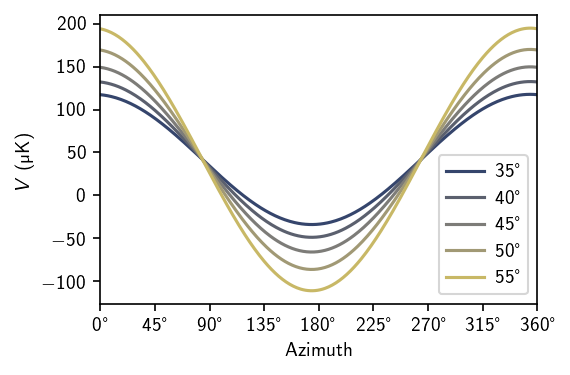

In [4]:
plt.figure(figsize=(3.9, 2.6), dpi=150)

az = np.linspace(0, 360, 361)
for i in np.linspace(55, 35, 5).astype(int):
    # Label is zenith angle
    plt.plot(az, fit((np.deg2rad(i), np.deg2rad(az)), *fit_results) * 1e6, label='\SI{' + str(90-i) + '}{\degree}')

plt.xticks(np.linspace(0, 360, 9), ['\SI{' + str(int(i)) + '}{\degree}' for i in np.linspace(0, 360, 9)])
plt.xlim((0, 360))
plt.xlabel('Azimuth')
plt.ylabel('\emph{V} (\si{\micro\kelvin})')
plt.legend(loc='lower right', labelspacing=0.4, handletextpad=0.6)
plt.tight_layout()
plt.savefig('../result-data/az-altitude-dependence.pdf')